<a href="https://colab.research.google.com/github/aderdouri/ActuarialThesis/blob/master/R/myTDboost_real_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("TDboost")
install.packages("caret")
install.packages("ggplot2")
install.packages("dplyr")
install.packages('cplm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘biglm’, ‘minqa’, ‘statmod’, ‘tweedie’




In [ ]:
library(tweedie)
library(TDboost)
library(reshape2)
library(ggplot2)
library(caret)
library(dplyr)
library(cplm)

Loading required package: lattice

Loaded TDboost 1.4



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: coda

Loading required package: Matrix

Loading required package: splines



In [ ]:
url = "https://raw.githubusercontent.com/aderdouri/ActuarialThesis/master/Data/encodedBASEAUTO.csv"
encodedBASEAUTO <- read.csv(url, stringsAsFactors = F, check.names = F)
head(encodedBASEAUTO)

,ACV,SEX,STATUT,AGECOND,K8000,RM,CAR,USAGE_Prive,USAGE_PriveTrajet,USAGE_Professionnel,⋯,SEGM_H,SEGM_M1,SEGM_M2,GARAGE_ClosCollectif,GARAGE_GarageAutre,GARAGE_IndividuelClos,CSP_CSP_50,CSP_CSP_60,CSP_CSP_AUTRE,CHARGE
,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.134929,1,1,-0.4576631,0,-0.09406372,0,0,1,0,⋯,0,0,0,0,1,0,1,0,0,0
2,1.134929,1,0,1.1011655,0,-0.81727943,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,0
3,1.134929,1,1,-1.8131662,0,1.50734251,0,0,1,0,⋯,0,0,0,0,1,0,0,0,1,0
4,1.134929,1,0,0.6267394,0,-0.81727943,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,0
5,1.134929,1,0,-1.2031898,0,1.50734251,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,0
6,1.134929,1,0,-0.2543376,1,-0.81727943,0,1,0,0,⋯,0,0,0,0,1,0,0,0,1,0


In [ ]:
# We will start by loading the BASEAUTO data
#encodedBASEAUTO <- encodedBASEAUTO
length(encodedBASEAUTO)
length(encodedBASEAUTO$CHARGE)
encodedBASEAUTO <- as.data.frame(encodedBASEAUTO)

[1] 68

[1] 10496

In [ ]:
#Mettre la variable CHARGE à la première position du dataset(1st column).
encodedBASEAUTO <- encodedBASEAUTO%>%relocate(CHARGE, .before = 'ACV')

In [ ]:
head(encodedBASEAUTO)

,CHARGE,ACV,SEX,STATUT,AGECOND,K8000,RM,CAR,USAGE_Prive,USAGE_PriveTrajet,⋯,SEGM_B,SEGM_H,SEGM_M1,SEGM_M2,GARAGE_ClosCollectif,GARAGE_GarageAutre,GARAGE_IndividuelClos,CSP_CSP_50,CSP_CSP_60,CSP_CSP_AUTRE
,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1.134929,1,1,-0.4576631,0,-0.09406372,0,0,1,⋯,0,0,0,0,0,1,0,1,0,0
2,0,1.134929,1,0,1.1011655,0,-0.81727943,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
3,0,1.134929,1,1,-1.8131662,0,1.50734251,0,0,1,⋯,0,0,0,0,0,1,0,0,0,1
4,0,1.134929,1,0,0.6267394,0,-0.81727943,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
5,0,1.134929,1,0,-1.2031898,0,1.50734251,0,1,0,⋯,1,0,0,0,0,1,0,1,0,0
6,0,1.134929,1,0,-0.2543376,1,-0.81727943,0,1,0,⋯,0,0,0,0,0,1,0,0,0,1


In [ ]:
source(
  paste0("https://raw.githubusercontent.com/aderdouri/ActuarialThesis/master/EMTboost/",
  "TDBoost_source_real.R"
  )
)

In [ ]:
source(
  paste0("https://raw.githubusercontent.com/aderdouri/ActuarialThesis/master/EMTboost/",
  "EMTboost_HE_real.R"
  )
)

In [ ]:
#############################################
## Undersampling the nonzeros in real data ##
## to generate a new dataset               ##
#load("dat_clean.rda")
dat <- encodedBASEAUTO
zero.index <- which(dat$CHARGE==0)
zero.num <- length(zero.index)
nonzero.index <- which(dat$CHARGE!=0)
nonzero.num <- length(nonzero.index)
zero.data <- dat[zero.index,]
nonzero.data <- dat[nonzero.index,]
over.para <- 1
zero.over.num <- ceiling(zero.num*over.para)
under.para <- 0.15 # Undersampling fraction
nonzero.under.num <- ceiling(nonzero.num*under.para)
zero.percentage <- zero.over.num/(zero.over.num+nonzero.under.num)



nrep <- 1# 20
## For saving the parameters
rho_TD_list <- phi_TD_list <- rho_EMT_list <- phi_EMT_list <- q_EMT_list <- array(NA,dim=c(nrep,2))


## For performance comparison

MAE.list <- GINI.list <- array(NA,dim=c(nrep,2))
gini_matrix.list <- array(NA,dim=c(nrep,2,2))
gini_select.list <- rep(NA,times=nrep)
model.list <- c("TDboost", "EMTboost")
for (i in 1:nrep)
{

  print(paste("Replication",i))

  #####################################
  ## Generate dataset from real data ##
  under.nonzero.index <- sample(nonzero.index,nonzero.under.num,replace=TRUE)
  over.zero.index <- sample(zero.index,zero.over.num,replace=TRUE)
  U <- sample(c(0,1),size=nonzero.under.num,replace=TRUE,prob=c(0.5,0.5))
  train.nonzero.index <- under.nonzero.index[which(U==0)]
  test.nonzero.index <- under.nonzero.index[which(U==1)]
  V <- sample(c(0,1),size=zero.over.num,replace=TRUE,prob=c(0.5,0.5))
  train.zero.index <- over.zero.index[which(V==0)]
  test.zero.index <- over.zero.index[which(V==1)]
  train.data <- dat[c(train.nonzero.index,train.zero.index),]
  test.data <- dat[c(test.nonzero.index,test.zero.index),]

  loss <- test.data$CHARGE
  N <- length(loss)


  ###############
  ## TDboost   ##
  ################################################
  ## estimating phi, rho via profile likelihood ##
  TD_out <- TDboost.profile.real(CHARGE ~ AGECOND+RM+ACV,    # formula
                                 data=train.data,
                                 p.vec=seq(1.2,1.6,0.05),
                                 verbose=2,
                                 phi.method="mle",
                                 n.trees=350,
                                 do.plot=TRUE,
                                 method="series",
                                 verbose1=FALSE,
                                 do.smooth=FALSE)

  rho_TD.star <- TD_out$p.max
  print(paste('The estimated rho is:', rho_TD.star))
  rho_TD_list[i] <- rho_TD.star

  phi_TD.star <- TD_out$phi.max
  print(paste('The estimated phi is:', phi_TD.star))
  phi_TD_list[i] <- phi_TD.star

  #######################################
  ## TDboost: using the estimated rho  ##
  TD_m <- TDboost(CHARGE ~ AGECOND+RM+ACV,
                  data = train.data,
                  distribution = list(name="EDM",alpha=rho_TD.star),
                  shrinkage = 0.005,
                  n.trees = 350,
                  interaction.depth = 7,
                  bag.fraction = 0.5,
                  n.minobsinnode = 20,
                  keep.data = FALSE,
                  cv.folds = 5,
                  verbose = FALSE)

  best.iter <- TDboost.perf(TD_m, method="cv", plot.it = TRUE)
  pred_mu_TD <- predict.TDboost(TD_m, test.data, best.iter)
  pred_f_TD <- predict.TDboost(TD_m, test.data, best.iter, type='link')


  ##################
  ## Performance  ##
  ## TDboost
  #  MAE
  mae_TD <- mean(abs(pred_mu_TD - loss))
  print(paste('Round',i,'TDboost MAE is', mae_TD))
  MAE.list[i,1] <- mae_TD
  #  GINI
  GINI.list[i,1] <- ((sum(loss*rank(pred_mu_TD,ties.method="last"))/sum(loss))-((N+1)/2))/((sum(loss*rank(loss,ties.method="last"))/sum(loss))-((N+1)/2))
  print(paste("TDboost GINI:",GINI.list[i,1]))
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


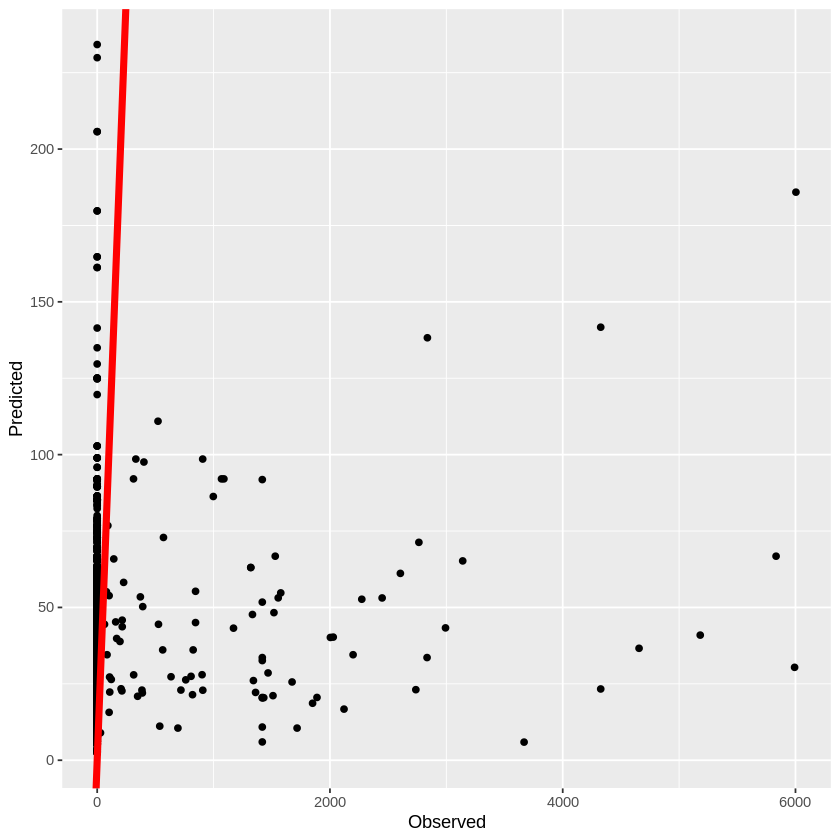

In [ ]:
# Create data for ggplot2
data_mod <- data.frame(Predicted = pred_mu_TD, Observed = loss)

# Draw plot using ggplot2 package
ggplot(data_mod,
       aes(x = Observed,
           y = Predicted)) +
  geom_point() +
  geom_abline(intercept = 0,
              slope = 1,
              color = "red",
              size = 2)

In [ ]:
data_mod$exposure = rep(1.0, length(data_mod$Predicted))
data_mod$obs <- 1:(dim(data_mod)[1])

In [ ]:
options(repr.plot.width=14, repr.plot.height=10)

In [ ]:
# Calculate bins of equal exposure based on sorting
# by model A predictions
#
nbBins = 20
set.seed(13472)
ord <- order(data_mod$Predicted, runif(length(data_mod$Predicted)))
data_mod <- data_mod[ord,]
cum.expo <- cumsum(data_mod$exposure)
total.exposure <- sum(data_mod$exposure)
bks <- c(0, 1:(nbBins-1) * total.exposure/nbBins, (nbBins+0.2) * total.exposure/nbBins)
data_mod$bin.A <- cut(cum.expo, breaks = bks, labels = 1:nbBins)
data_mod <- data_mod[order(data_mod$obs),]

#rm(ord, cum.expo, total.exposure, bks)
# Check that summing exposure by bin number gives about
# equal exposure in each bin
tapply(data_mod$exposure, data_mod$bin.A, sum)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
233 233 233 234 233 233 233 234 233 233 233 234 233 233 233 234 233 233 233 234

In [ ]:
avg.Predicted <- tapply(data_mod$Predicted, data_mod$bin.A, mean)/mean(data_mod$Predicted)
avg.actual <- tapply(data_mod$Observed, data_mod$bin.A, mean)/mean(data_mod$Predicted)

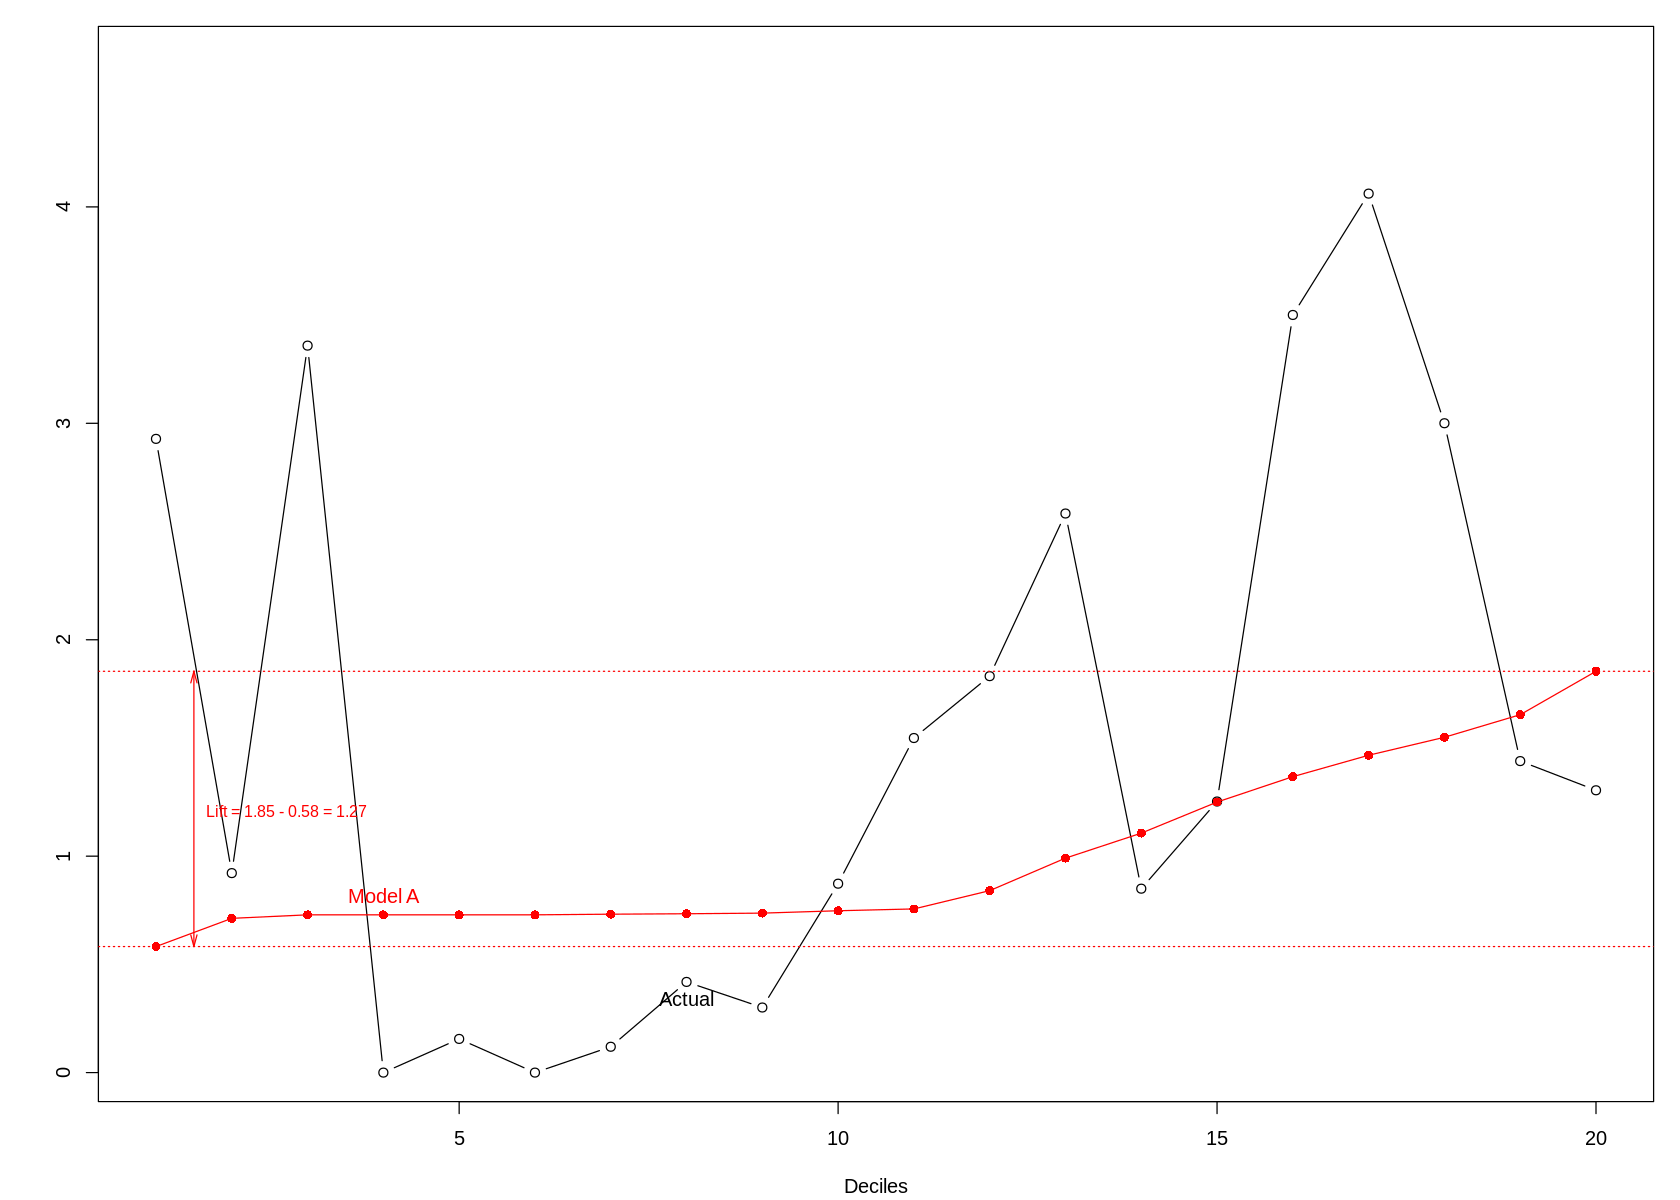

In [ ]:
#
# Now let's calculate the lift that the new model provides
# compared to the current base model using deciles
#
avg.Predicted <- tapply(data_mod$Predicted, data_mod$bin.A, mean)/mean(data_mod$Predicted)
avg.actual <- tapply(data_mod$Observed, data_mod$bin.A, mean)/mean(data_mod$Predicted)

par(mar = c(4,4,1,1)+0.1)
lim = c(0.05, 4.65)
plot(x = 1:nbBins, y = avg.actual, type = "b", ylim = lim,
xlab = "Deciles", ylab = "")
points(x = 1:nbBins, y = avg.Predicted, pch = 16, col = "red")
lines(x = 1:nbBins, y = avg.Predicted, col = "red")
text(x = 8, y = avg.actual[8], labels = "Actual", pos = 1)
text(x = 4, y = avg.Predicted[4], labels = "Model A", pos = 3, col = "red")
abline(h = avg.Predicted[c(1,nbBins)], lty = 3, col = "red")
arrows(x0 = 1.5, y0 = avg.Predicted[1], x1 = 1.5, y1 = avg.Predicted[nbBins],
code = 3, col = "red", angle = 15, length = 0.1)

text(x = 1.5, y = 1.2,
labels = paste(c("Lift = ",
round(avg.Predicted[nbBins],2), " - ",
round(avg.Predicted[1],2), " = ",
round(diff(avg.Predicted[c(1,nbBins)]),2)),
collapse = ""),
pos = 4, cex = 0.8, col = "red")
rm(avg.Predicted, avg.actual, lim)